**Клевицкий Дмитрий 18.10.24**

1) На семинаре разобрали алгоритм ветвей и границ и муравьиный алгоритм
2) Начал поиск данных для ИП и изучение матриалов для проекта

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

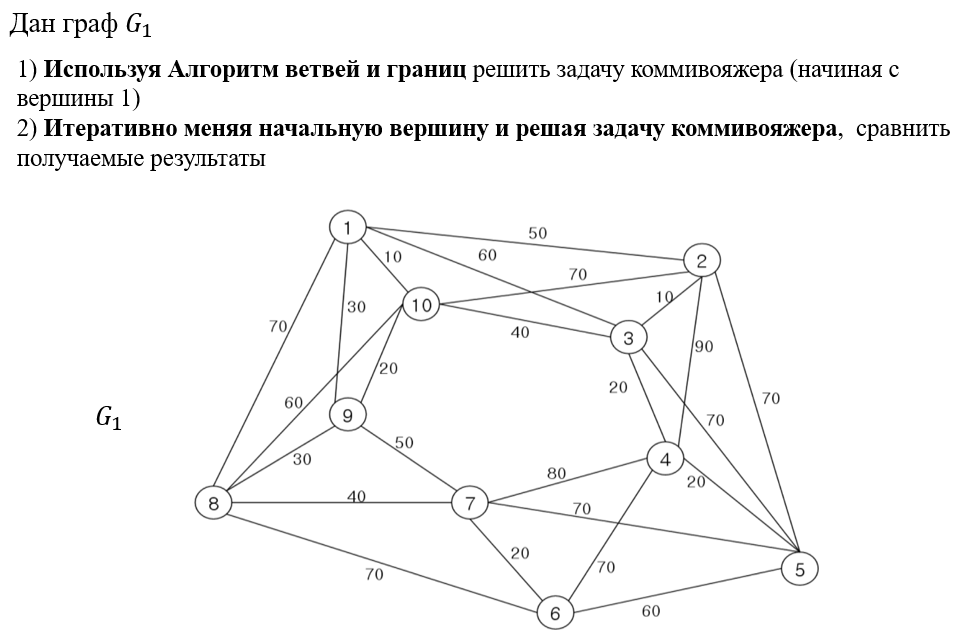

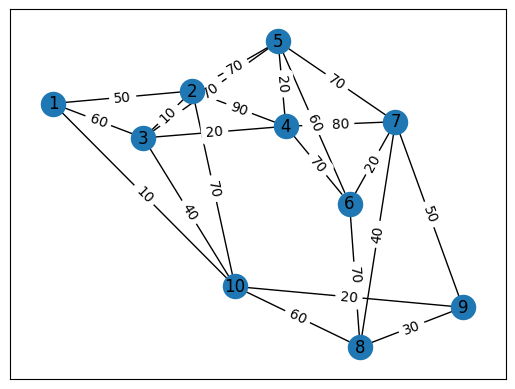

In [2]:
edges = [
    (1, 2, 50), (1, 3, 60), (1, 10, 10), (2, 3, 10), (2, 4, 90), 
    (2, 5, 70), (2, 10, 70), (3, 10, 40), (3, 4, 20), (3, 5, 70),
    (4, 6, 70), (4, 7, 80), (4, 5, 20),
    (5, 6, 60), (5, 7, 70), (6, 7, 20), (6, 8, 70),
    (7, 8, 40), (7, 9, 50), (8, 9, 30), (8, 10, 60),
    (9, 10, 20)
]
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [6]:
import itertools

In [9]:
def tsp_branch_and_bound(G, start):
    vertices = list(G.nodes)
    vertices.remove(start)
    min_path = None
    min_cost = float('inf')
    for perm in itertools.permutations(vertices):
        current_cost = 0
        current_path = [start] + list(perm) + [start]
        for i in range(len(current_path) - 1):
            u, v = current_path[i], current_path[i + 1]
            if G.has_edge(u, v):
                current_cost += G[u][v]['weight']
            else:
                current_cost = float('inf')
                break
        if current_cost < min_cost:
            min_cost = current_cost
            min_path = current_path
    return min_path, min_cost


results = {}
for start_vertex in G.nodes:
    path, cost = tsp_branch_and_bound(G, start_vertex)
    results[start_vertex] = {'path': path, 'cost': cost}
for start_vertex, result in results.items():
    print(f"Старт: {start_vertex}, Путь: {result['path']}, Стоимость: {result['cost']}")

Старт: 1, Путь: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1], Стоимость: 280
Старт: 2, Путь: [2, 1, 10, 9, 8, 7, 6, 5, 4, 3, 2], Стоимость: 280
Старт: 3, Путь: [3, 2, 1, 10, 9, 8, 7, 6, 5, 4, 3], Стоимость: 280
Старт: 10, Путь: [10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Стоимость: 280
Старт: 4, Путь: [4, 3, 2, 1, 10, 9, 8, 7, 6, 5, 4], Стоимость: 280
Старт: 5, Путь: [5, 4, 3, 2, 1, 10, 9, 8, 7, 6, 5], Стоимость: 280
Старт: 6, Путь: [6, 5, 4, 3, 2, 1, 10, 9, 8, 7, 6], Стоимость: 280
Старт: 7, Путь: [7, 6, 5, 4, 3, 2, 1, 10, 9, 8, 7], Стоимость: 280
Старт: 8, Путь: [8, 7, 6, 5, 4, 3, 2, 1, 10, 9, 8], Стоимость: 280
Старт: 9, Путь: [9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9], Стоимость: 280
